# Oficina 1: Modelo de previsão de temperaturas


1. ## Planejamento

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from tensorflow.keras import Input
from sklearn.metrics import mean_squared_error

2. ##  Carregamento e Preparação dos Dados

In [26]:
np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)


   Temperatura
0    26.764052
1    27.406646
2    29.910104
3    32.937234
4    34.097184


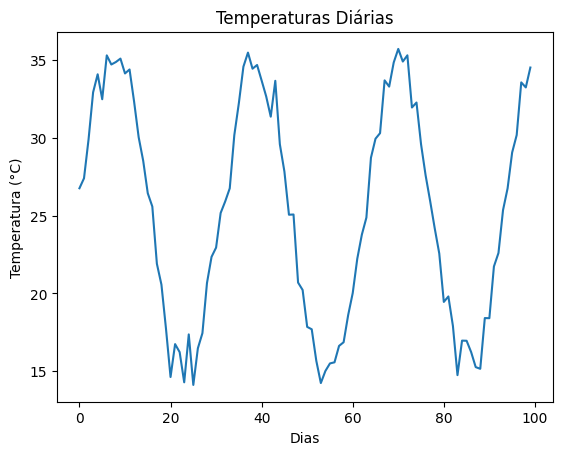

In [27]:
# Gerando dados fictícios de temperaturas diárias para os últimos 100 dias

np.random.seed(0)
data = np.sin(np.linspace(0, 20, 100)) * 10 + 25 + np.random.normal(0, 1, 100)

# Transformando os dados em um DataFrame para facilitar a manipulação
df = pd.DataFrame(data, columns=["Temperatura"])  # Fixed quotes

# Exibindo as primeiras 5 linhas do DataFrame para visualizar os dados
print(df.head())

# Visualizando os dados de temperatura para ter uma ideia das tendências
plt.plot(df)
plt.title("Temperaturas Diárias")  # Fixed quotes
plt.xlabel("Dias")  # Fixed quotes
plt.ylabel("Temperatura (°C)")  # Fixed quotes
plt.show()

In [33]:
# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Criando sequências de entrada e saída
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Dividindo os dados em treinamento e teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Redimensionando os dados para o formato esperado pela LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [34]:
# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

# Compilando o modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Treinando o modelo
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.4187
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.3088
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.2373
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1701
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1365
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1502
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1468
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1193
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1167
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1026
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1091
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1070
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0996
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0998
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0944
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


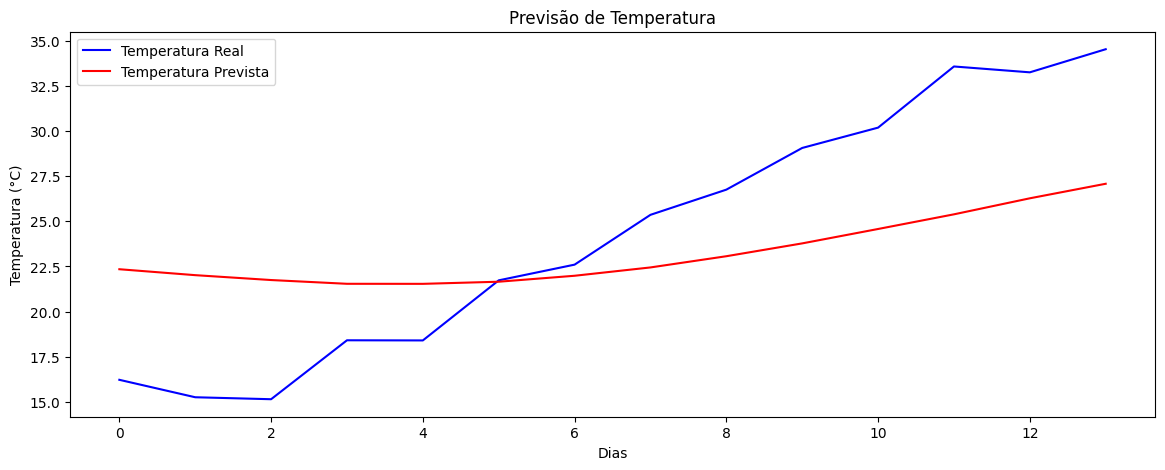

In [35]:
# Fazendo previsões
predicted_temperatures = model.predict(X_test)
predicted_temperatures = scaler.inverse_transform(predicted_temperatures)

# Invertendo a transformação dos dados de teste
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualizando os resultados
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, color='blue', label='Temperatura Real')
plt.plot(predicted_temperatures, color='red', label='Temperatura Prevista')
plt.title('Previsão de Temperatura')
plt.xlabel('Dias')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()
